In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(np.int64)


/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


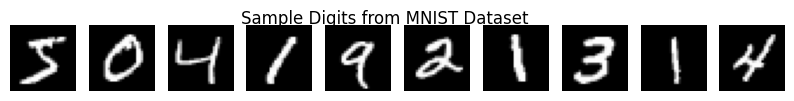

In [3]:
# Display a few examples from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle('Sample Digits from MNIST Dataset')
plt.show()

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)


In [ ]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize some predictions
n_samples = 10
fig, axes = plt.subplots(2, n_samples, figsize=(10, 2))
for i in range(n_samples):
    ax = axes[0, i]
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'True: {y_test.iloc[i]}')
    
    ax = axes[1, i]
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Pred: {y_pred[i]}')
plt.suptitle('True and Predicted Labels of Sample Digits')
plt.show()